# <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTE2v_RBFRd6_fPwA5wYa0gjfhV3M2lzCp5uQ&usqp=CAU" width="240" height="360" />

 # Machine Learning on Candy dataset

# Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Preprocessing](#section3)
4. [Model fitting and evaluation](#section4)<br>

<a id=section1></a>

## 1. Problem Statement

 The goal is to predict winpercent of halloween candies and find best fitting model from Linear Regression, Decision Tree and Random Forest.

<a id=section2></a>

## 2. Data Loading and Description

<a id=section201></a>

- Data was collected by creating a website where participants were shown presenting two fun-sized candies and asked to click on the one they would prefer to receive.
- The dataset comprises of __85 candies and 13 feature columns__. Below is a table showing names of all the columns and their description.

| Column Name     | Description                                               |
| -------------   |:-------------                                            :| 
| competitorname  | Name of competitor candy                                  | 
| chocolate       | Does it contain chocolate?                                |  
| fruity          | Is it fruit flavored?                                     | 
| caramel         | Is there caramel in the candy?                            |   
| peanutalmondy   | Does it contain peanuts, peanut butter or almonds?        |
| nougat          | Does it contain nougat?                                   |
| crispedricewafer| Does it contain crisped rice, wafers, or a cookie component?|
| hard            | Is it a hard candy?                                       |
| bar             | Is it a candy bar?                                        |
| pluribus        | Is it one of many candies in a bag or box?                |
| sugarpercent    | The percentile of sugar it falls under within the data set|
| pricepercent    | The unit price percentile compared to the rest of the set |
| winpercent      | The overall win percentage                                |

#### Importing packages                                          

In [1]:
#importng calculation, visualization, dataframe, ML model creation packages

import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt


from sklearn import metrics 

import numpy as np 

# allow plots to appear directly in the notebook
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Importing the Dataset

In [2]:
#load data

data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/candy-data.csv")
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [ ]:
#data info

print(data.shape)
data.info()

(85, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [3]:
data.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


<a id=section3></a>

## 3. Preprocessing the data

In [5]:
data['competitorname'] = data['competitorname'].str.replace('Õ', "'") #Like replace HersheyÕs Kisses with Hershey's Kisses

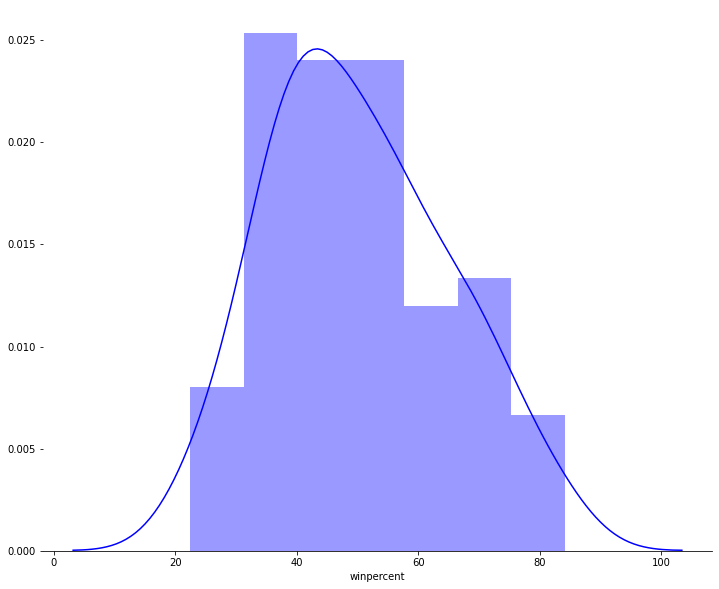

In [ ]:
#Distribution of Target variable

f, axes = plt.subplots( figsize=(12, 10), sharex=True) 
sns.despine(left=True)

sns.distplot(data.winpercent, color="b")

Target variable "Winpercent" is Normally distributed.

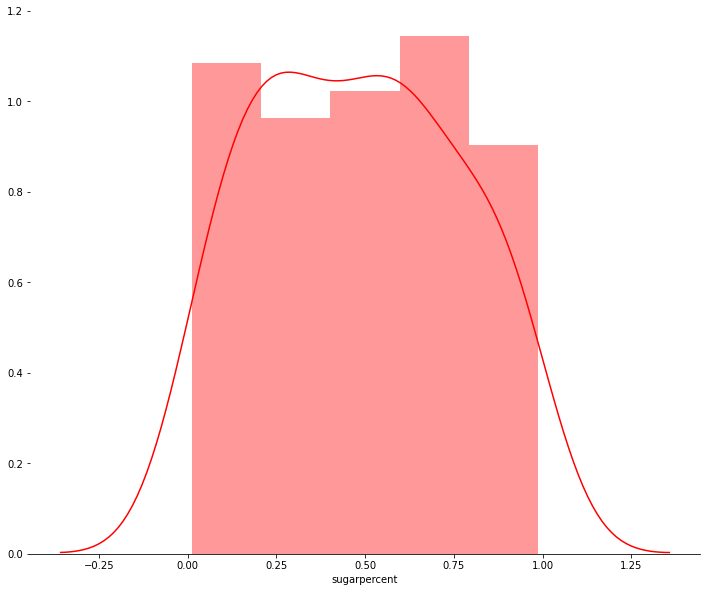

In [ ]:
#Distribution of continuous Explanatory variable

f, axes = plt.subplots( figsize=(12, 10), sharex=True) 
sns.despine(left=True)
sns.distplot(data.sugarpercent, color="r")

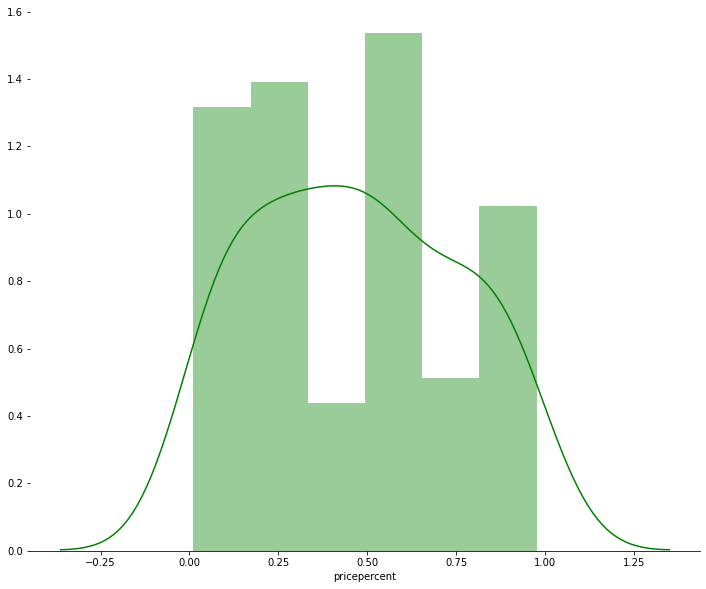

In [ ]:
f, axes = plt.subplots( figsize=(12, 10), sharex=True) 
sns.despine(left=True)
sns.distplot(data.pricepercent, color="g")

Explanatory variables - sugarpercent and pricepercent are Normally Distributed.

In [23]:
#Modify winpercent to make it similar to other percent values.
data['winpercent'] = data['winpercent']/100
data.head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,0.669717
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,0.676029
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,0.322611
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,0.461165
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,0.523415
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,0.503475
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,0.569145
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,0.234178
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,0.380110
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,0.345177


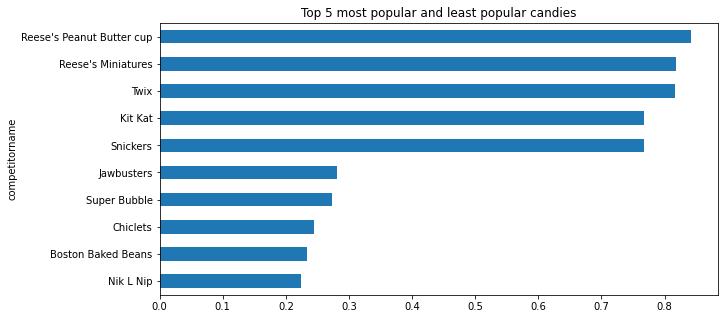

In [ ]:
# Top 5 most popular and least popular candies

popularity = data[['competitorname','winpercent']].sort_values(by='winpercent')
pd.concat([popularity.head(5),popularity.tail(5)],axis=0).plot(x='competitorname',y='winpercent',kind='barh',title='Top 5 most popular and least popular candies',sort_columns=True,figsize = (10,5),legend=False);

In [ ]:
data.sort_values(by=['winpercent'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,0.841803
51,Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,0.818663
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,0.816429
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,0.767686
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,0.766738
53,Reese's pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,0.734350
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,0.730996
54,Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,0.728879
32,Peanut butter M&M's,1,0,0,1,0,0,0,0,1,0.825,0.651,0.714651
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,0.707356


Top 10 popular candies are chocolaty, non fruity and not a hard candy.


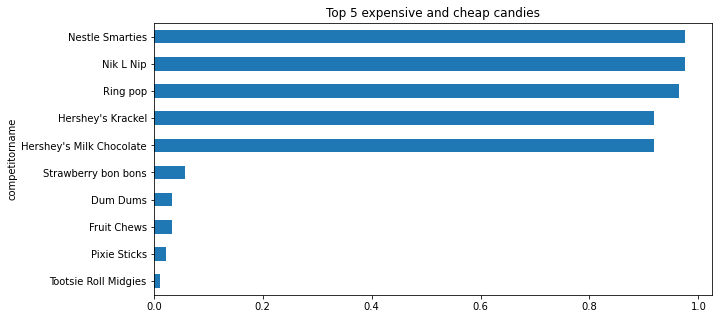

In [ ]:
# Top 5 expensive and cheap candies

price = data[['competitorname','pricepercent']].sort_values(by='pricepercent')
pd.concat([price.head(5),price.tail(5)],axis=0).plot(x='competitorname',y='pricepercent',kind='barh',title='Top 5 expensive and cheap candies',sort_columns=True,figsize = (10,5),legend=False);

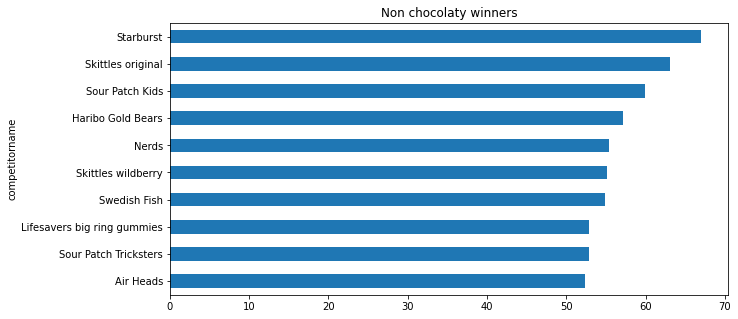

In [14]:
# Competitors which are not chocolaty but winners
nochocolate = data[data['chocolate']==0].sort_values(by=['winpercent'])
nochocolate.tail(10).plot(x='competitorname',y='winpercent',kind='barh',title='Non chocolaty winners',sort_columns=True,figsize = (10,5),legend=False);

In [15]:
nochocolate.tail(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
67,Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,52.825947
31,Lifesavers big ring gummies,0,1,0,0,0,0,0,0,0,0.267,0.279,52.911392
73,Swedish Fish,0,1,0,0,0,0,0,0,1,0.604,0.755,54.861111
61,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.941,0.220,55.103695
41,Nerds,0,1,0,0,0,0,1,0,1,0.848,0.325,55.354046
18,Haribo Gold Bears,0,1,0,0,0,0,0,0,1,0.465,0.465,57.119740
66,Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998
60,Skittles original,0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140
68,Starburst,0,1,0,0,0,0,0,0,1,0.151,0.220,67.037628


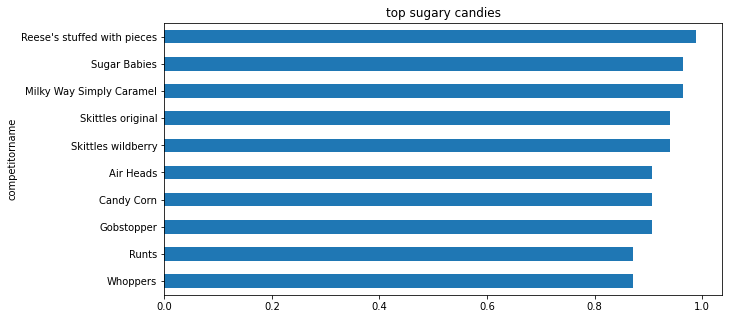

In [6]:
# top 10 sugary candies
sugary = data.sort_values(by=['sugarpercent'], ascending=True)
sugary.tail(10).plot(x='competitorname', y='sugarpercent', kind='barh', title='top sugary candies',figsize = (10,5), legend=False);

In [13]:
sugary.tail(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
84,Whoppers,1,0,0,0,0,1,0,0,1,0.872,0.848,49.524113
58,Runts,0,1,0,0,0,0,1,0,1,0.872,0.279,42.849144
17,Gobstopper,0,1,0,0,0,0,1,0,1,0.906,0.453,46.783348
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
61,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.941,0.220,55.103695
60,Skittles original,0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140
38,Milky Way Simply Caramel,1,0,1,0,0,0,0,1,0,0.965,0.860,64.353340
70,Sugar Babies,0,0,1,0,0,0,0,0,1,0.965,0.767,33.437550
54,Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901


Reese's stuffed with pieces is exceptionally popular sweet candy.

In [ ]:
# chocolaty as well as fruity candies
data[(data['chocolate']==1)&(data['fruity']==1)]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
74,Tootsie Pop,1,1,0,0,0,0,1,0,0,0.604,0.325,0.489827


#Establishing __correlation__ between all the features using __heatmap__.

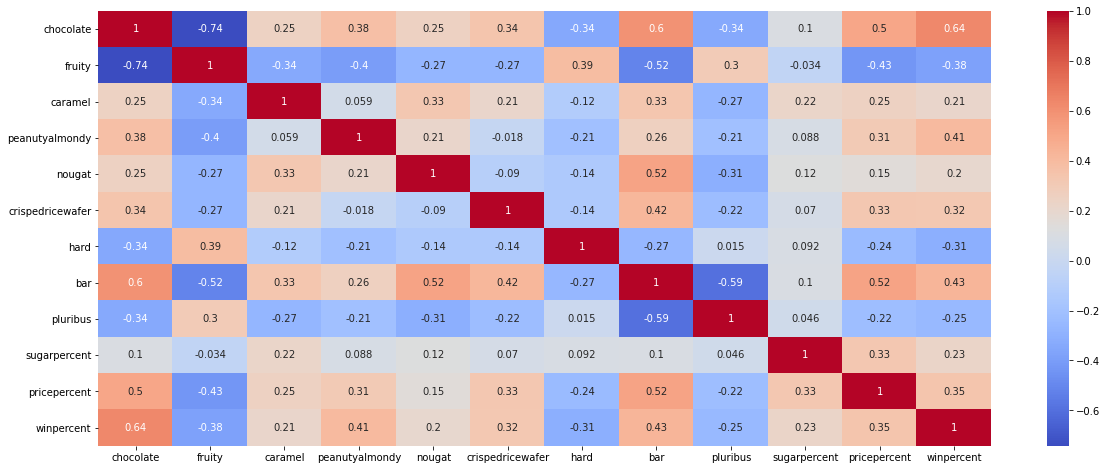

In [ ]:
# correlation heatmap
plt.figure(figsize = (20,8))        
sns.heatmap(data.corr(),annot=True, cmap = 'coolwarm');

Correlation between all variables is <0.8.

## 4. Model fitting and evaluation 

<a id=section501></a>

In [24]:
# prepare data for training set

#X- all columns except species
X = data.iloc[:, 1:-1]

#Y - last column
y = data.iloc[:, -1]

print(X,y)

    chocolate  fruity  caramel  ...  pluribus  sugarpercent  pricepercent
0           1       0        1  ...         0         0.732         0.860
1           1       0        0  ...         0         0.604         0.511
2           0       0        0  ...         0         0.011         0.116
3           0       0        0  ...         0         0.011         0.511
4           0       1        0  ...         0         0.906         0.511
..        ...     ...      ...  ...       ...           ...           ...
80          0       1        0  ...         0         0.220         0.116
81          0       1        0  ...         0         0.093         0.116
82          0       1        0  ...         1         0.313         0.313
83          0       0        1  ...         0         0.186         0.267
84          1       0        0  ...         1         0.872         0.848

[85 rows x 11 columns] 0     0.669717
1     0.676029
2     0.322611
3     0.461165
4     0.523415
        ...  

In [25]:
#Test-train split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
#Model1 - Lineaar regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linreg = LinearRegression()

linreg.fit(X_train,y_train) #calculation of coefficients

y_pred_test= linreg.predict(X_test) 
RMSE_test_LR = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))  


y_pred_train = linreg.predict(X_train) 
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)) 

In [27]:
y_pred_test

array([0.4210572 , 0.67008109, 0.40642552, 0.51497342, 0.39152447,
       0.41859632, 0.62992021, 0.42726896, 0.50859267, 0.4026803 ,
       0.62613427, 0.62503899, 0.51424321, 0.45133468, 0.42145205,
       0.70373809, 0.56073913])

In [28]:
print('Intercept:',linreg.intercept_)                                    
print('Coefficients:',linreg.coef_) 

Intercept: 0.3570229227432462
Coefficients: [ 0.1886639   0.08311682 -0.00040491  0.08738057  0.04494756  0.08758688
 -0.05056733  0.00087762 -0.03940221  0.09948579 -0.04242897]


In [29]:
y_test

78    0.471732
0     0.669717
68    0.670376
22    0.553755
12    0.245250
82    0.443755
10    0.389750
18    0.571197
4     0.523415
66    0.598640
40    0.545265
47    0.694838
35    0.550641
72    0.273039
55    0.352908
54    0.728879
33    0.665746
Name: winpercent, dtype: float64

In [ ]:
RMSE_test_LR

0.1268790575253926

In [33]:
#Model2 - DecisionTreeRegression
from sklearn.tree import DecisionTreeRegressor
DTreg = DecisionTreeRegressor(max_depth=5)
DTreg.fit(X_train,y_train)
y_pred_test= DTreg.predict(X_test) 
RMSE_test_DT = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)) 
RMSE_test_DT

0.1356053782220763

In [34]:
#Model3 - RandomForestRegression
from sklearn.ensemble import RandomForestRegressor
RFreg = RandomForestRegressor(n_estimators=100)
RFreg.fit(X_train, y_train)
y_pred_test = RFreg.predict(X_test)
RMSE_test =np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
RMSE_test_DT

0.1356053782220763